In [1]:
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, "ry", "cz")
optimizer = SLSQP(maxiter=1000)

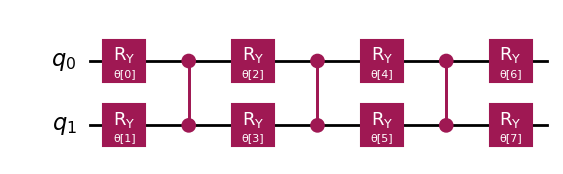

In [2]:
ansatz.decompose().draw("mpl", style="iqx")

In [3]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [4]:
from qiskit_algorithms import VQE

vqe = VQE(estimator, ansatz, optimizer)

In [5]:
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156)
])

In [6]:
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 55,
    'eigenvalue': -1.8572749246282718,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000002BB2957B790>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -4.7841749409842524,
                              ParameterVectorElement(θ[1]): -2.3614635298018536,
                              ParameterVectorElement(θ[2]): 4.792276289612869,
                              ParameterVectorElement(θ[3]): 5.514697230842299,
                              ParameterVectorElement(θ[4]): -6.508323000135728,
                              ParameterVectorElement(θ[5]): 1.6381764826365548,
                              ParameterVectorElement(θ[6]): -5.316282196507563,
                              ParameterVectorElement(θ[7]): -0.6705191185181457},
    'optimal_point': array([-4.78417494, -2.36146353,  4.79227629,  5.51469723, -6.508323  ,
        1.63817648, -5.3162822 , -0.67051912]),
    '

In [7]:
from qiskit_algorithms.optimizers import SPSA

estimator = Estimator(options={"shots": 1000})

vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -1.8574980884779746,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000002BB3BB7E2D0>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -2.6905526620442064,
                              ParameterVectorElement(θ[1]): 3.91297532139232,
                              ParameterVectorElement(θ[2]): -3.307311066013706,
                              ParameterVectorElement(θ[3]): 1.1801144164852468,
                              ParameterVectorElement(θ[4]): -6.509627973860405,
                              ParameterVectorElement(θ[5]): -2.650837392303864,
                              ParameterVectorElement(θ[6]): -3.5605356349889306,
                              ParameterVectorElement(θ[7]): -0.8612818711876334},
    'optimal_point': array([-2.69055266,  3.91297532, -3.30731107,  1.18011442, -6.50962797,
       -2.65083739, -3.56053563, -0.86128187]),
    

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright